# <center> Exploratory Data Analysis


## Importing Dependecies

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Dataset first look

 Before performing more detailed data exploration we will first load the `stores_sales.csv` file and then get a quick understanding of the structure of the dataset.

### Loading the dataset 

In [3]:
df = pd.read_csv('../data/stores-sales.csv')
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### General info

In [4]:
print(f' the dataset contains {df.shape[0]} lines and {df.shape[1]} features') 

 the dataset contains 6435 lines and 8 features


In [5]:
# Let's have a look at the general aspects of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_Price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
# Let's check the number of stores in the dataset 

print(f"The number of stores in the dataset is {df['store'].nunique()}")

# Each store holds 143 datapoints
v = int((df['store'].value_counts() == 143).sum())
print(f'{v} of the stores contains 143 datapoint')

The number of stores in the dataset is 45
45 of the stores contains 143 datapoint


### Missing Values Check

In [8]:
# Checking for missing values
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_Price      0
cpi             0
unemployment    0
dtype: int64

### Changing the date type 

In [9]:
# Changing the date column type into datetime format 

df['date'] = pd.to_datetime(df['date'] , format = '%d-%m-%Y')

# Let's check the period of the data collection
print(df['date'].head())
df['date'].tail()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: date, dtype: datetime64[ns]


6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: date, dtype: datetime64[ns]

### Summary

The dataset contains the `weekly_sales` of **45 stores** in the period between **5 February 2010** and **26 october 2012** 

First exploration shows that the data is clean as there are no clear `NaN` values but deeper exploration will be performed in the next steps.
We also denote that each store has 143 record representing 143 week which gives a total of `143 x 45 = 6435` datapoint

The dataset contains 8 columns described in the table : 
<center>

| Field         | Description                                 |
|---------------|---------------------------------------------|
| `store `        | Store identifier                             |
| `date`          | Week of sales                                |
| `weekly_sales`  | Total sales for the given store              |
| `holiday_flag`  | 1 if the week includes a holiday, 0 otherwise|
| `temperature`   | Temperature in °F                            |
| `fuel_price`    | Cost of fuel in the region                   |
| `cpi`           | Consumer Price Index                         |
| `unemployment`  | Unemployment rate                            |

</center>



## Dataset exploration

### Understanding the weekly distribution: 

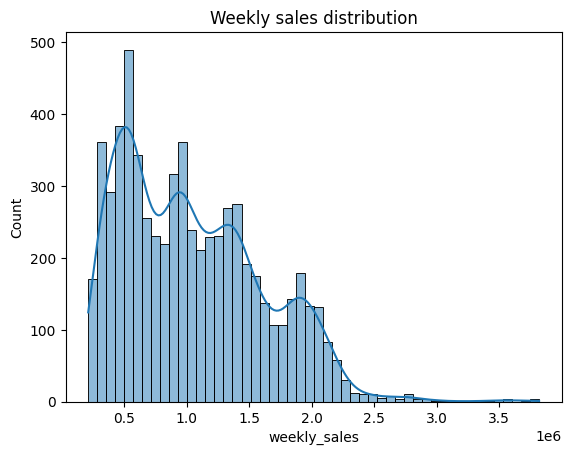

In [24]:
sns.histplot(df['weekly_sales'], kde=True , bins = 50)
plt.title('Weekly sales distribution')
plt.show()

### Plotting the weekly sales 

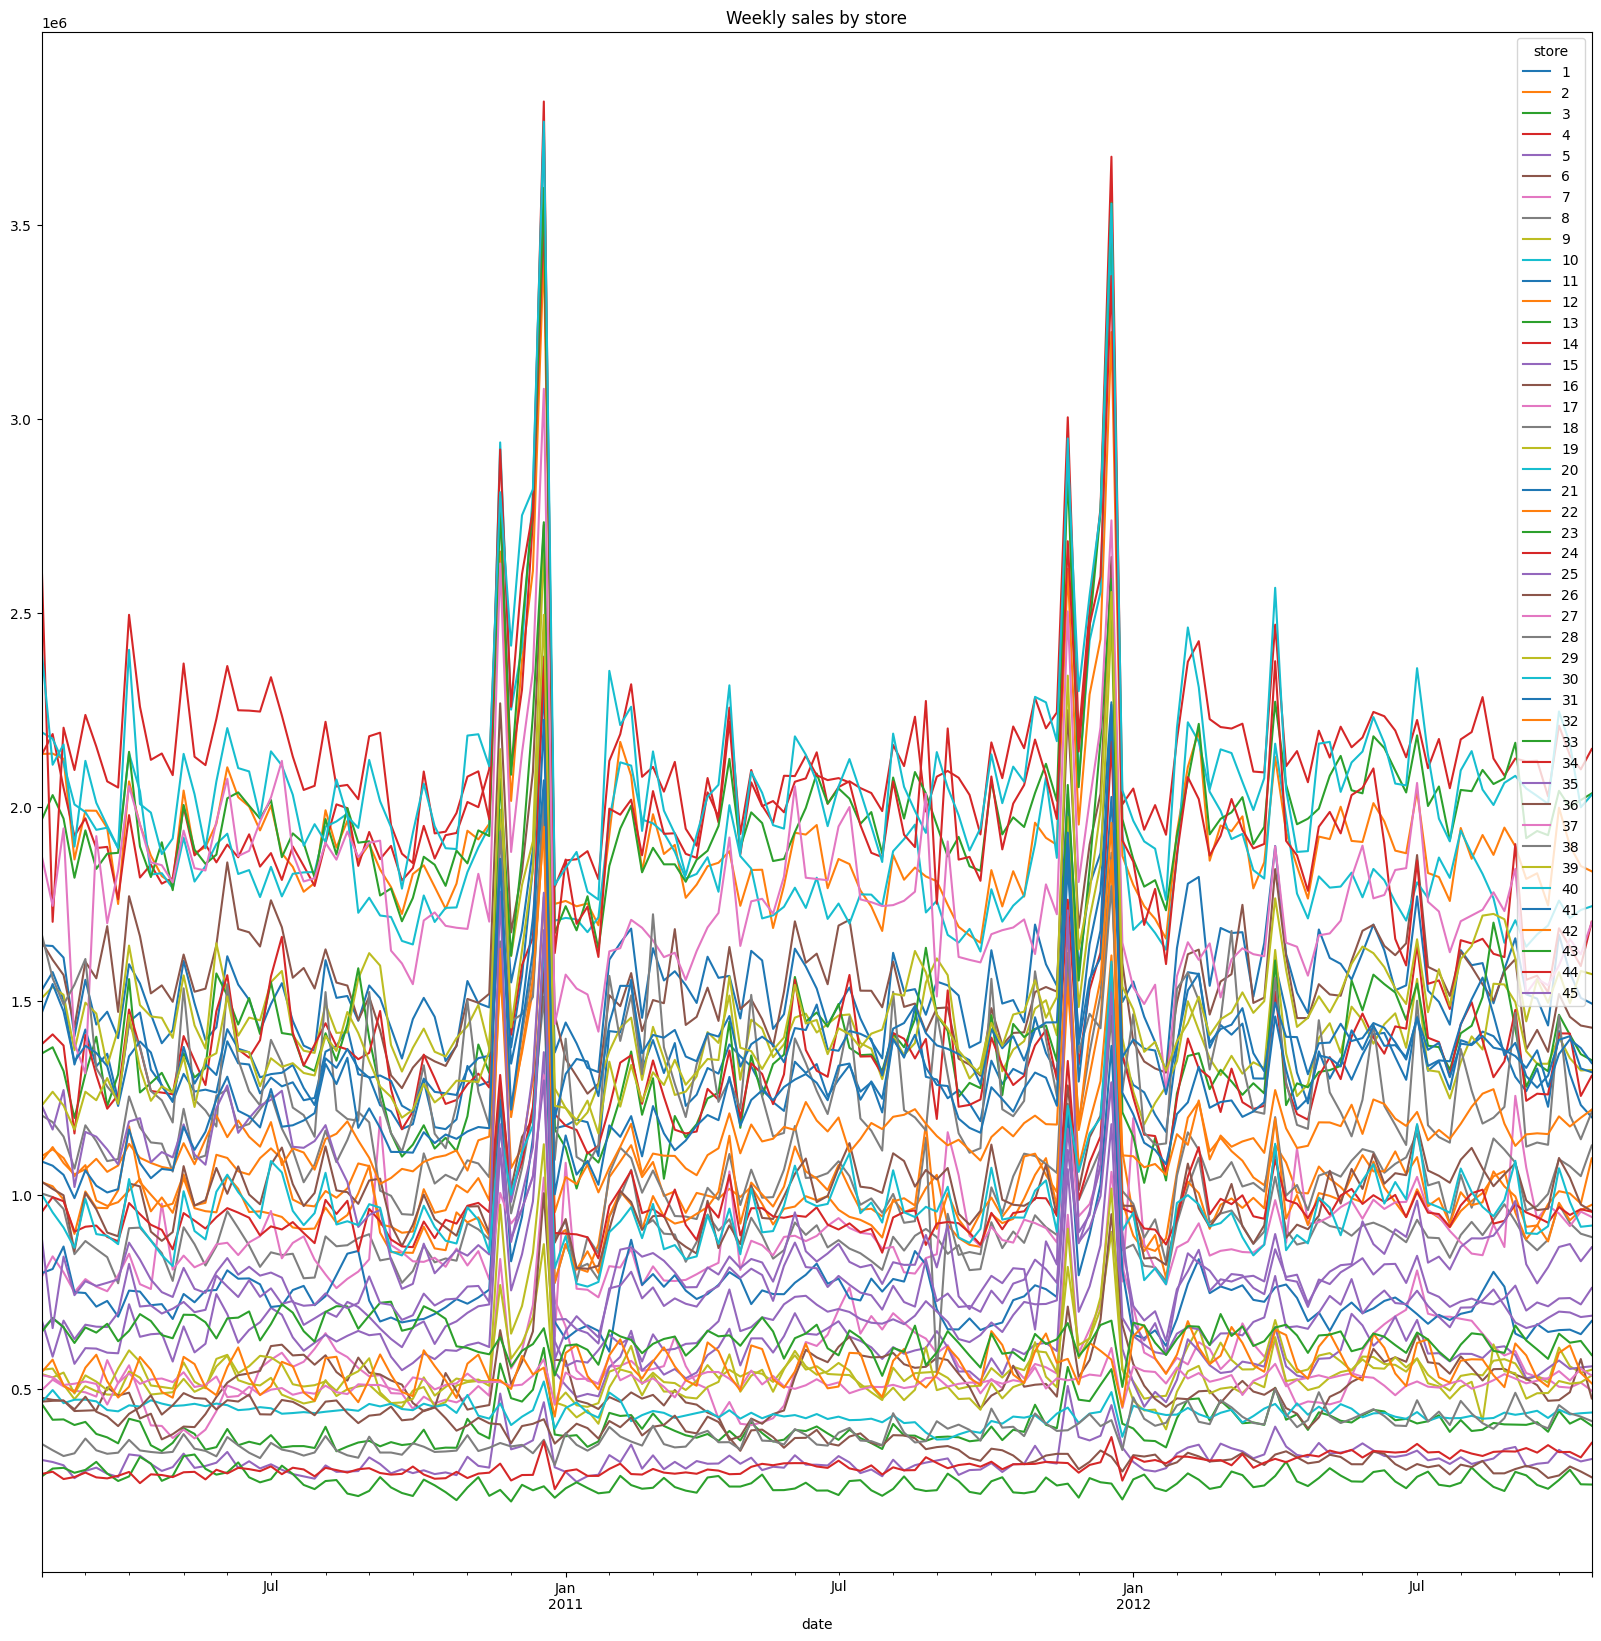

In [ ]:
# Plotting the weekly sales of each store during the whole duration of the study

df.groupby(['store','date'])['weekly_sales'].sum().unstack(0).plot(figsize=(20,20)) 
plt.title('Weekly sales by store')
plt.show()


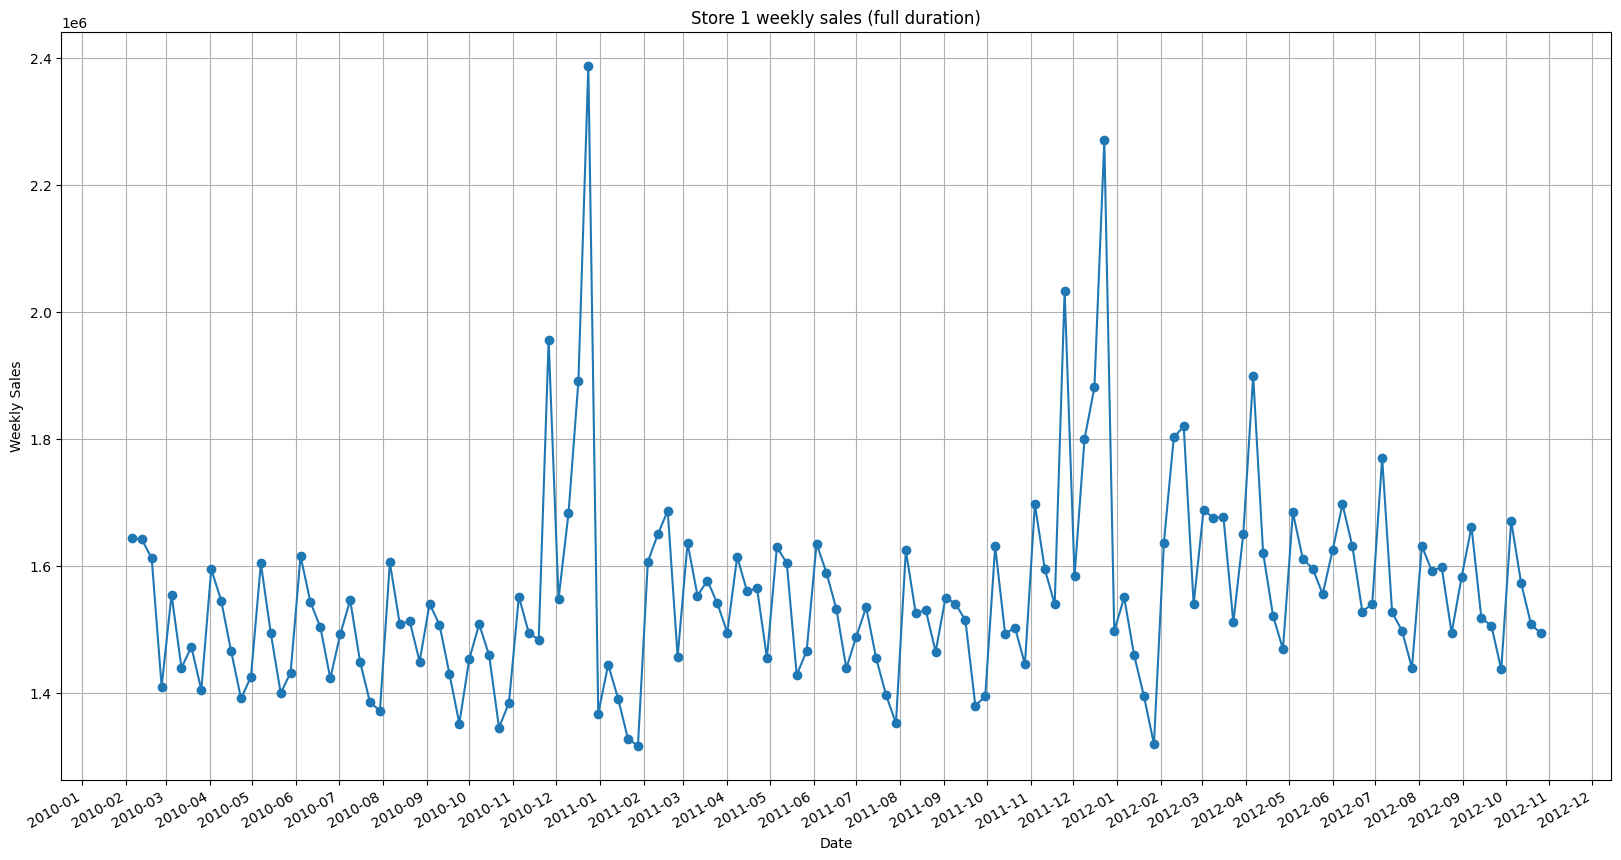

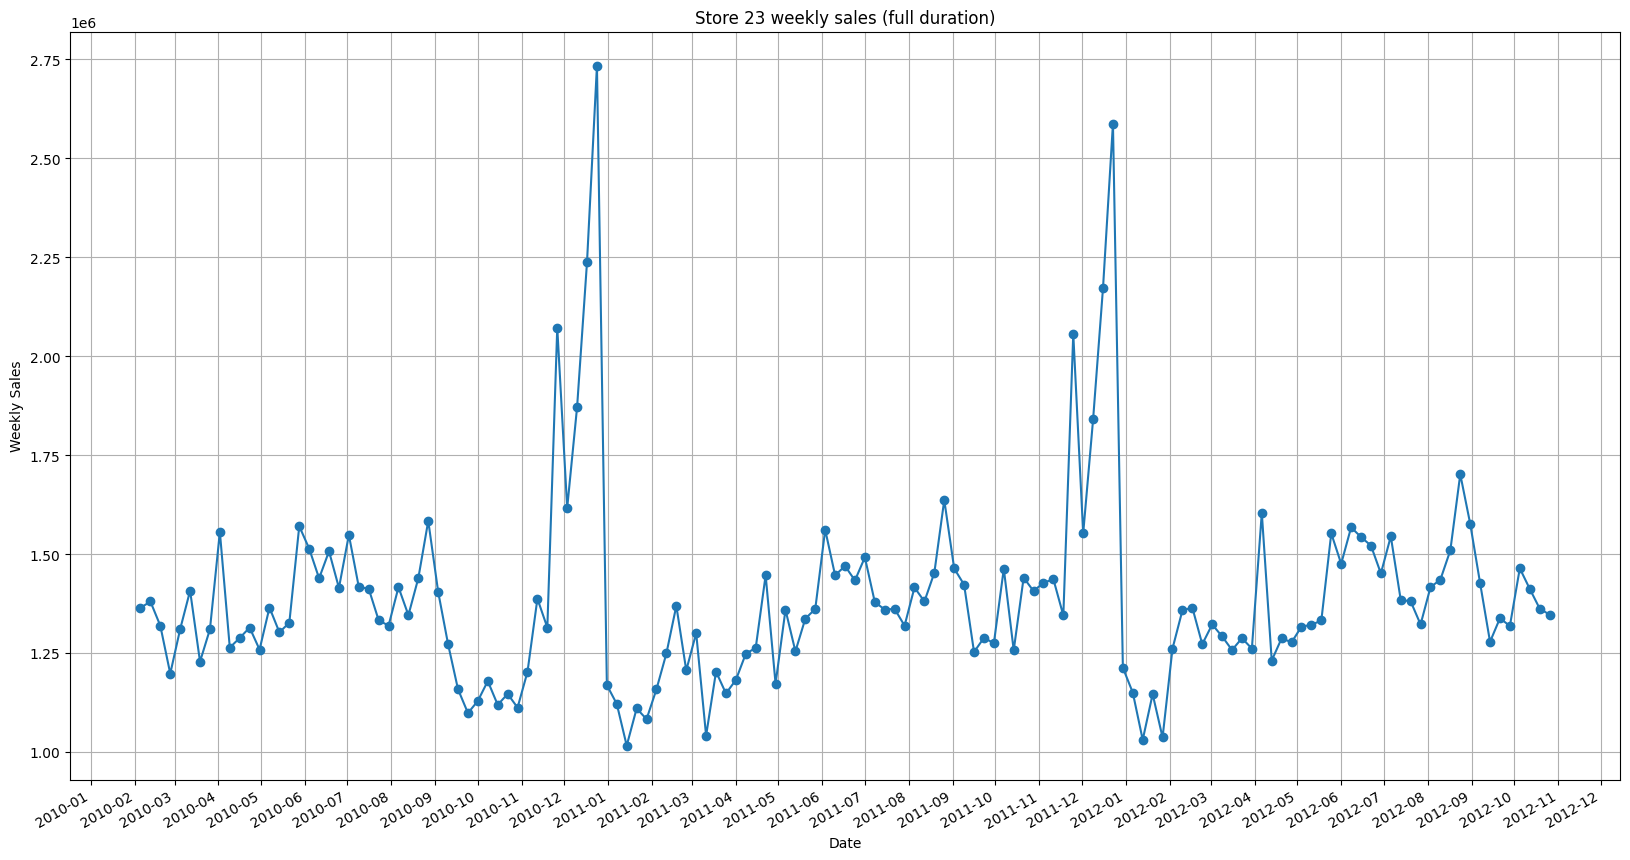

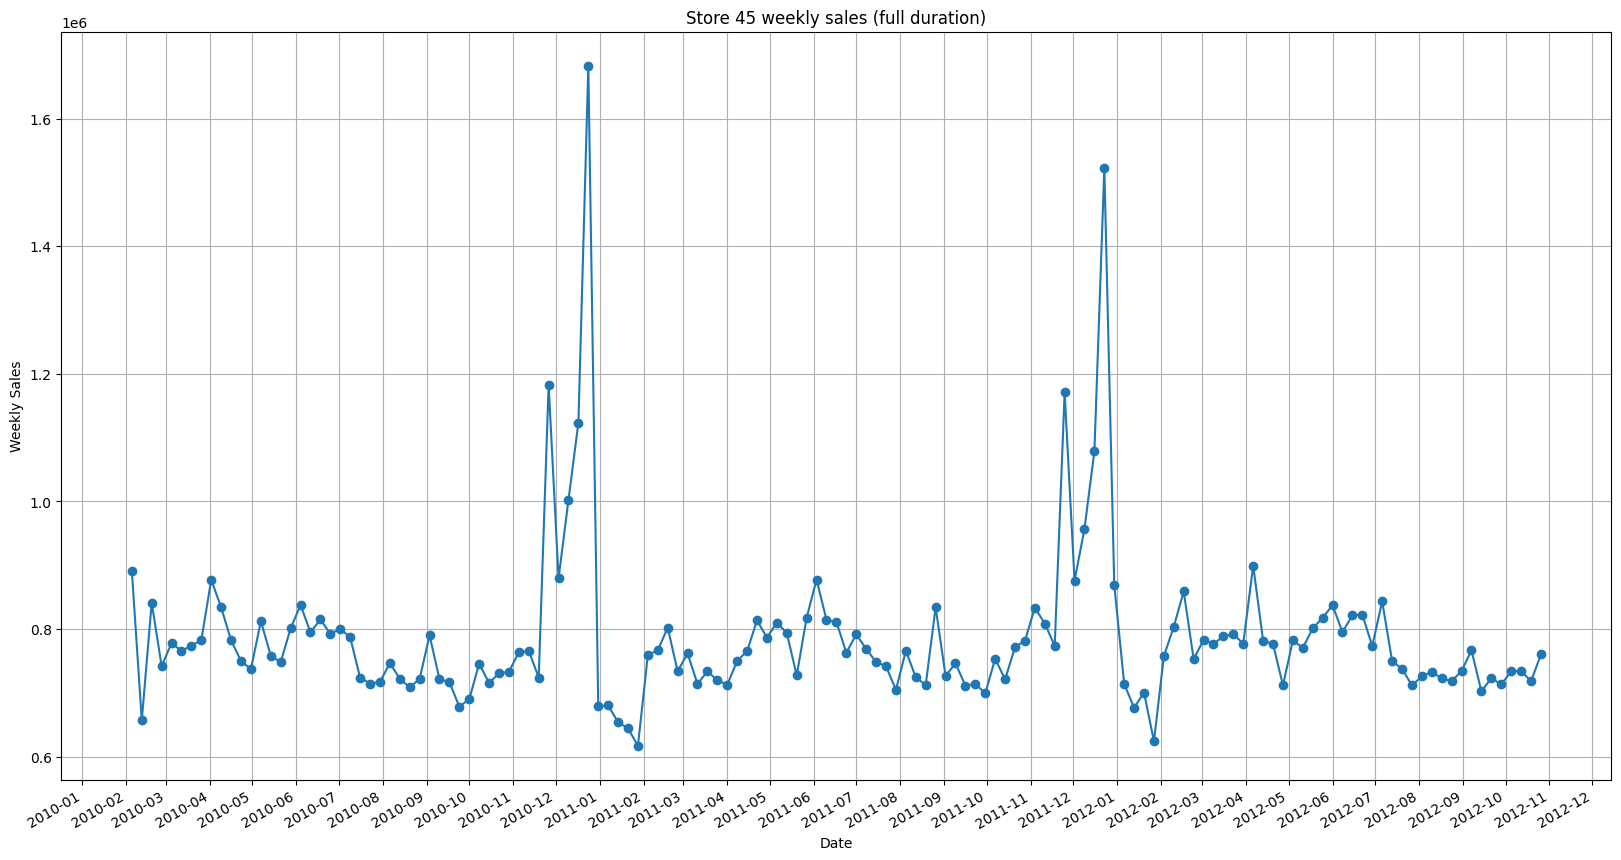

In [ ]:
def plot_time_serie(df, store_number: int, duration="all"):
    """
    Plot the weekly sales of a given store in a given duration.

    Parameters:
        df (DataFrame): pandas dataframe.
        store_number (int): the number of the store to plot.
        duration (string): "all" or a date in %Y-%m-%d format.

    Returns:
        fig: A matplotlib Figure object.
    """

    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])

    mask = (df['store'] == store_number)
    if duration != "all":
        duration = pd.to_datetime(duration)
        mask &= (df['date'] < duration)

    sub = df.loc[mask].sort_values('date')

    fig, ax = plt.subplots(figsize=(20, 11))
    ax.plot(sub['date'], sub['weekly_sales'], marker='o', linestyle='-')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()

    ax.set_xlabel('Date')
    ax.set_ylabel('Weekly Sales')
    ax.set_title(
        f"Store {store_number} weekly sales before {duration.date()}" 
        if duration != "all" else 
        f"Store {store_number} weekly sales (full duration)"
    )
    ax.grid(True)

    return fig

# let's plot the weekly sales of 3 stores to check for patterns 
fig1 = plot_time_serie(df, 1)
fig2 = plot_time_serie(df, 23)
fig3 = plot_time_serie(df, 45)


We can see some sort of a seasonality in the plot of the 3 stores where the `weekly_sales` atteign a maximum value towards the end of the year and then drops to a minimum in January and February.  

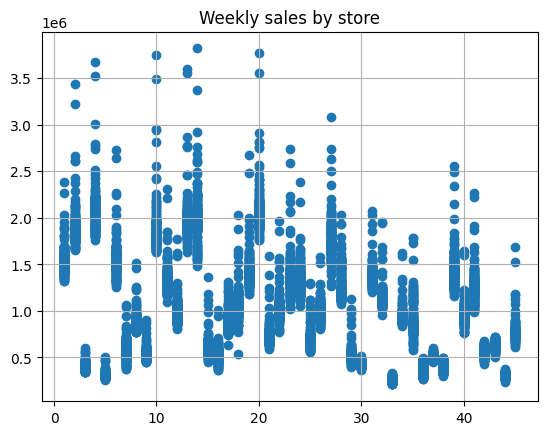

In [79]:
plt.scatter(df['store'], df['weekly_sales'])
plt.title("Weekly sales by store")
plt.grid(True)
plt.show()


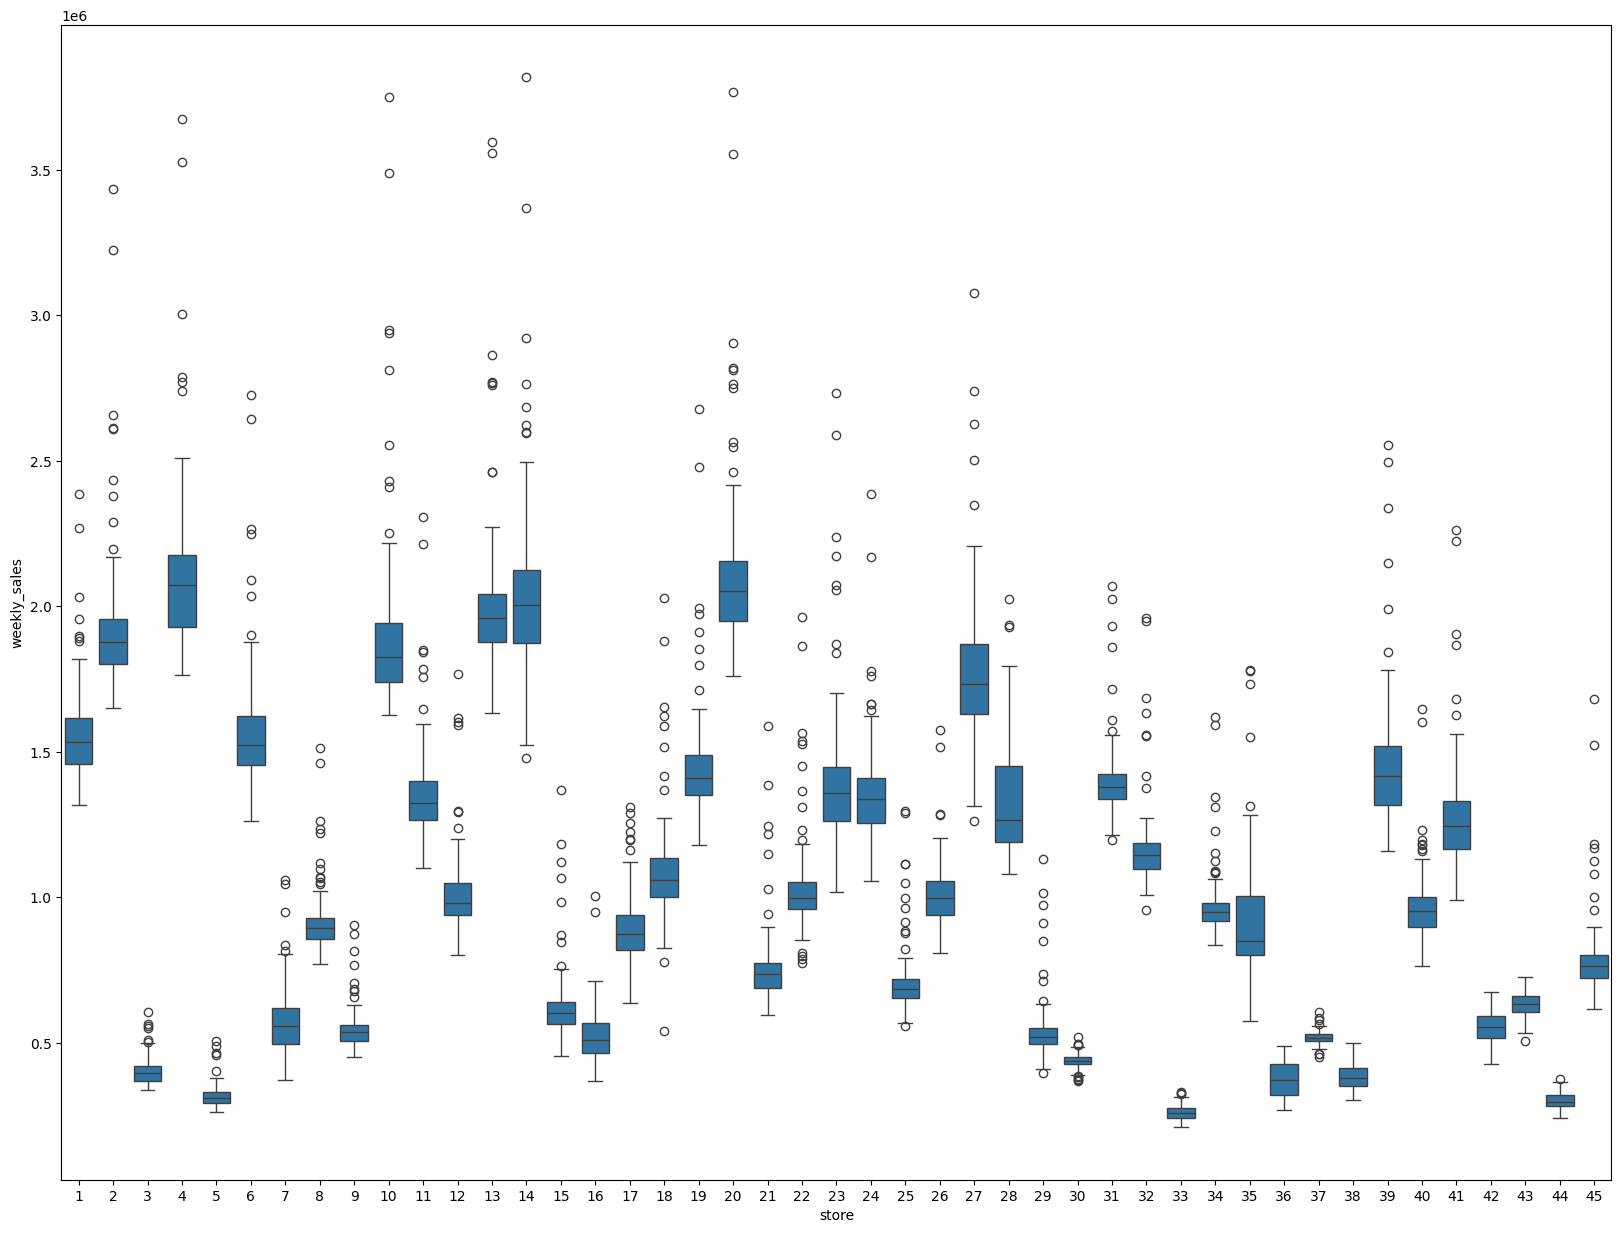

In [96]:
plt.figure(figsize=(20,15))
sns.boxplot(data = df, y= "weekly_sales", x = 'store')
plt.show()

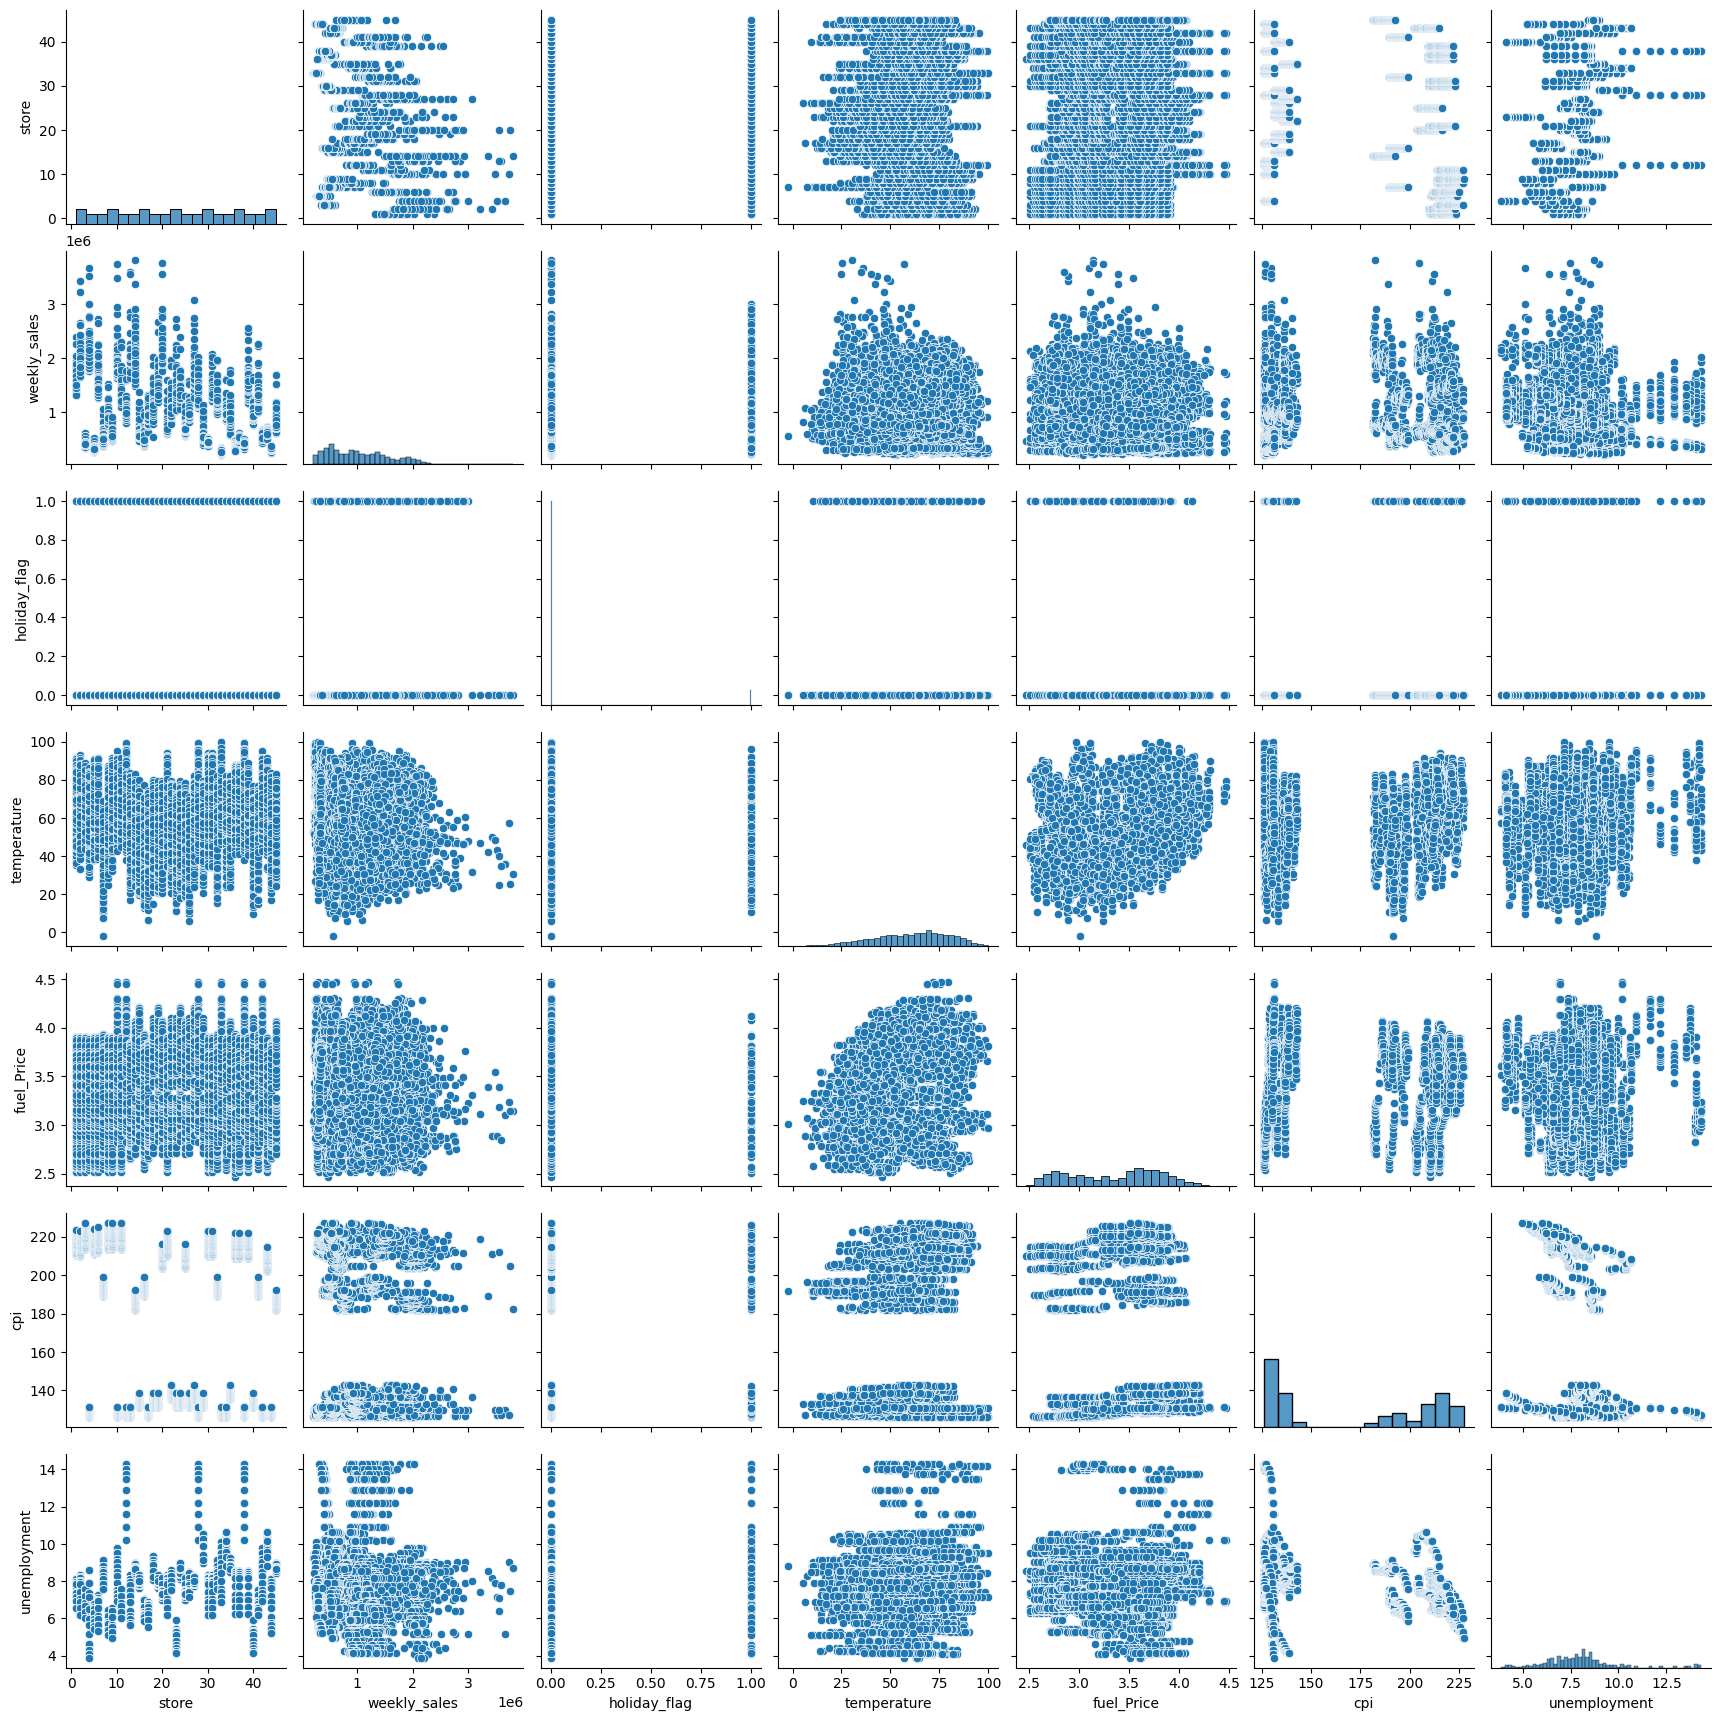

In [13]:
sns.pairplot(df)

In [ ]:
df.corr(numeric_only=True)['weekly_sales'].sort_values()

store          -0.335332
unemployment   -0.106176
cpi            -0.072634
temperature    -0.063810
fuel_Price      0.009464
holiday_flag    0.036891
weekly_sales    1.000000
Name: weekly_sales, dtype: float64

### Adding new time feature 

In [ ]:
df['month'] =df['date'].dt.month 
df['Year'] =df['date'].dt.year

In [39]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,Year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


<Axes: xlabel='Year'>

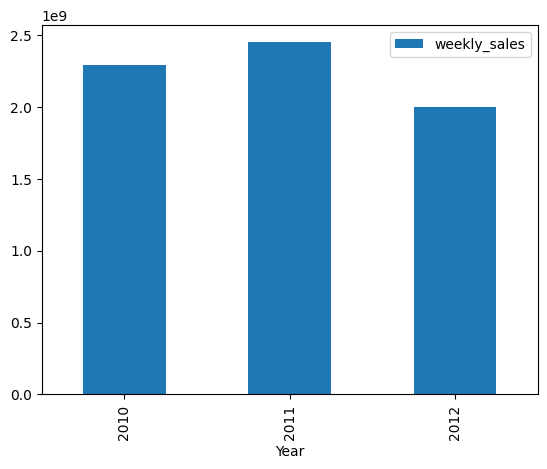

In [57]:
year_sales = pd.pivot_table(df, values='weekly_sales', index='Year', aggfunc='sum')
year_sales.plot(kind='bar')

<Axes: xlabel='month'>

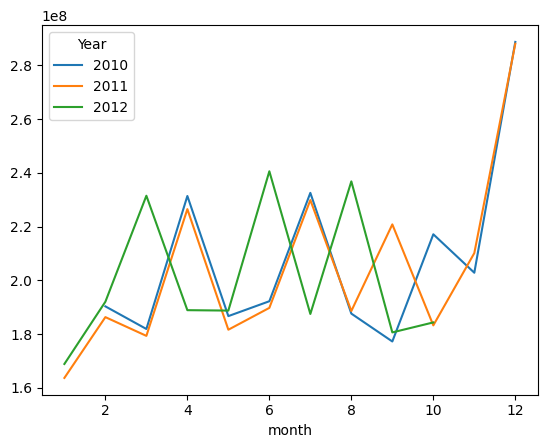

In [59]:
year_sales = pd.pivot_table(df, values='weekly_sales', index='month', columns='Year', aggfunc='sum')
year_sales.plot()

In [60]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,Year,month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10
